# Data import

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt 

#import dataset
df = pd.read_csv('model.csv')

In [4]:
df.shape #show the dimensions of dataset

(102351, 13)

# Exploratory Data Analysis 

In [5]:
df.duplicated() #verify if there are some duplicated rows

0         False
1         False
2         False
3         False
4         False
          ...  
102346    False
102347    False
102348    False
102349    False
102350    False
Length: 102351, dtype: bool

In [6]:
df.head(102351) 

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102347,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102348,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
102349,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0


In [7]:
df.isna().any() #show if there are NaN

id                      False
Gender                  False
Age                     False
Driving_License         False
Licence_Type             True
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Seniority               False
Target                  False
dtype: bool

In [8]:
df.isnull().sum() #show how many NaN there are

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [9]:
values = {'Licence_Type':'Z'} 
df2=df.fillna(value=values).head(102351)
#replace NaN whit 'Z'.

In [10]:
df2.isnull().sum() #verify if all Nan are replaced 

id                      0
Gender                  0
Age                     0
Driving_License         0
Licence_Type            0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Seniority               0
Target                  0
dtype: int64

In [11]:
df2.describe() #show basic statistical details of variables

,id,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority,Target
count,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000
mean,51176.000000,39.867339,0.950259,26.519936,30748.636398,107.407900,154.527030,0.317271
std,29546.333038,14.935793,0.217410,12.904874,17544.726810,55.327295,83.735221,0.465416
min,1.000000,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25588.500000,25.000000,1.000000,15.000000,24435.500000,26.000000,82.000000,0.000000
50%,51176.000000,39.000000,1.000000,28.000000,31943.000000,124.000000,155.000000,0.000000
75%,76763.500000,50.000000,1.000000,35.000000,39774.000000,152.000000,227.000000,1.000000
max,102351.000000,85.000000,1.000000,52.000000,540165.000000,163.000000,299.000000,1.000000


In [12]:
df2.tail() #print last rows

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
102346,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102347,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102348,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
102349,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0
102350,102351,Male,70,1,D,28,No,1-2 Year,Yes,2630,122,57,0


# Split categorical/numerical variables

In [13]:
df2.dtypes #show numerical and categorical variables

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [14]:
#transform numerical variables into categorincal ones
df2['Region_Code']=df2['Region_Code'].astype(object)
df2['Driving_License']=df2['Driving_License'].astype(object)
df2['Policy_Sales_Channel']=df2['Policy_Sales_Channel'].astype(object)

In [15]:
df2.dtypes #verify if numerical variables are trasformed in categorical

id                       int64
Gender                  object
Age                      int64
Driving_License         object
Licence_Type            object
Region_Code             object
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel    object
Seniority                int64
Target                   int64
dtype: object

In [16]:
#add all categorical variables to df_categorical
df_categorical=df2.select_dtypes(include=['object']) 
df_categorical.head(102351)

,Gender,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
0,Female,1,M,30,No,1-2 Year,Yes,154
1,Male,1,M,3,Yes,< 1 Year,No,152
2,Male,1,C,28,No,1-2 Year,Yes,52
3,Male,1,B,28,Yes,1-2 Year,No,26
4,Female,1,B,46,No,1-2 Year,Yes,124
...,...,...,...,...,...,...,...,...
102346,Female,1,B,32,Yes,< 1 Year,No,152
102347,Female,1,M,28,No,1-2 Year,Yes,26
102348,Male,1,M,8,No,> 2 Years,Yes,124
102349,Female,1,M,11,Yes,< 1 Year,No,152


In [17]:
#add all numerical variables to df_numerical
df_numerical=df2.select_dtypes(include=['int64','float64'])
df_numerical.head(102351)

,id,Age,Annual_Premium,Seniority,Target
0,1,44,25741,152,0
1,2,23,2630,256,0
2,3,43,70720,224,0
3,4,60,48512,86,0
4,5,42,32169,132,0
...,...,...,...,...,...
102346,102347,25,34695,133,0
102347,102348,47,30564,114,1
102348,102349,72,52844,92,1
102349,102350,25,26343,127,0


# Categorical data

In [18]:
df_categorical.shape #show the dimensions of dataset

(102351, 8)

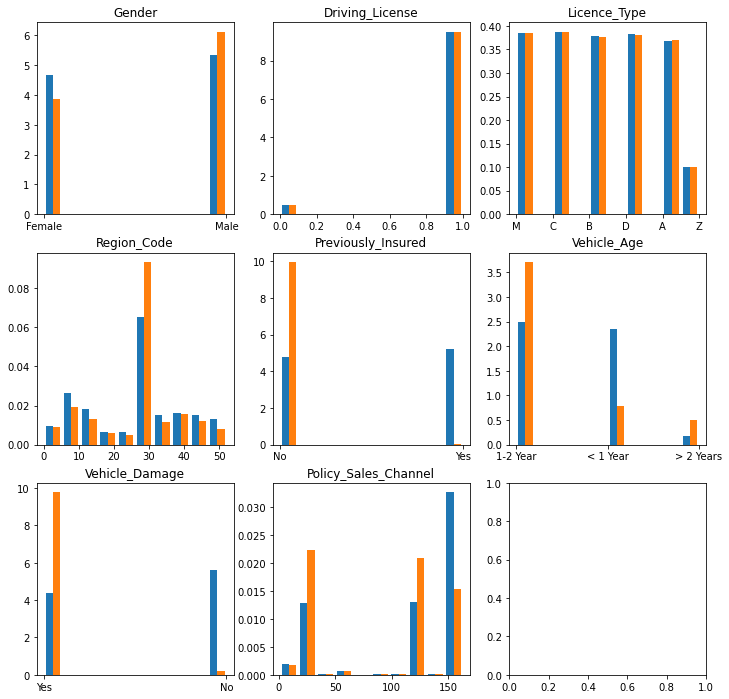

In [19]:
#How are distributed the differente classes on the zeros and ones

df_0=df_categorical[df2['Target']==0] # records wih target==0
df_1=df_categorical[df2['Target']==1] # records wih target==1


fig, axes = plt.subplots(3, 3,figsize=[12,12])
axes = axes.flatten()
i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()

#plot the histogram 

In [20]:
df_categorical.columns #show the columns' name  

Index(['Gender', 'Driving_License', 'Licence_Type', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel'],
      dtype='object')

In [21]:
#now we consider only some of variables
dummies = pd.get_dummies(df_categorical[['Gender', 'Region_Code',
'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
'Policy_Sales_Channel']],drop_first=True) 
dummies.tail()


,Gender_Male,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
102346,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102348,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
102349,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102350,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE1072B100>,
      dtype=object)

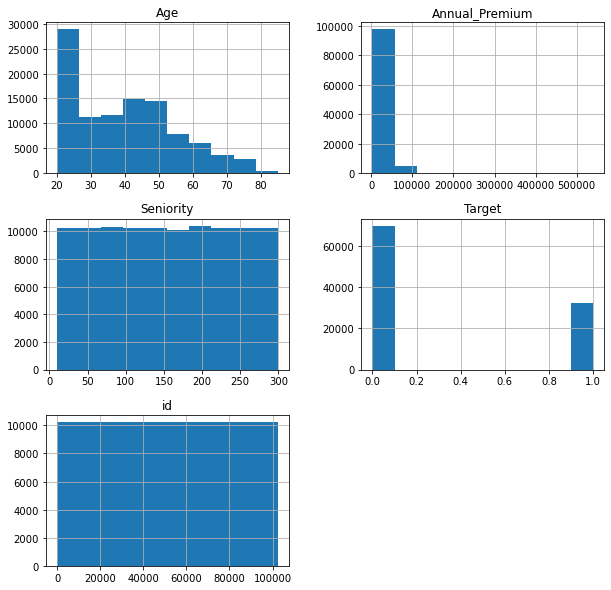

In [22]:
df_numerical.hist(figsize=(10,10)) #plot histogram

In [23]:
#applay the logarithm to some variables
import math
pd.options.mode.chained_assignment = None

df_numerical['logAnnual_Premium']=df_numerical['Annual_Premium'].apply(math.log)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE11B0C640>,
      dtype=object)

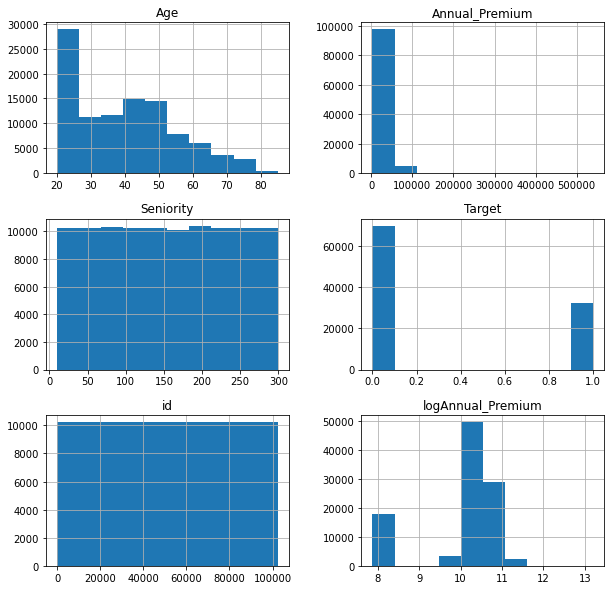

In [24]:
df_numerical.hist(figsize=(10,10)) #plot histogram

In [25]:
df_numerical.columns #show the columns' name

Index(['id', 'Age', 'Annual_Premium', 'Seniority', 'Target',
       'logAnnual_Premium'],
      dtype='object')

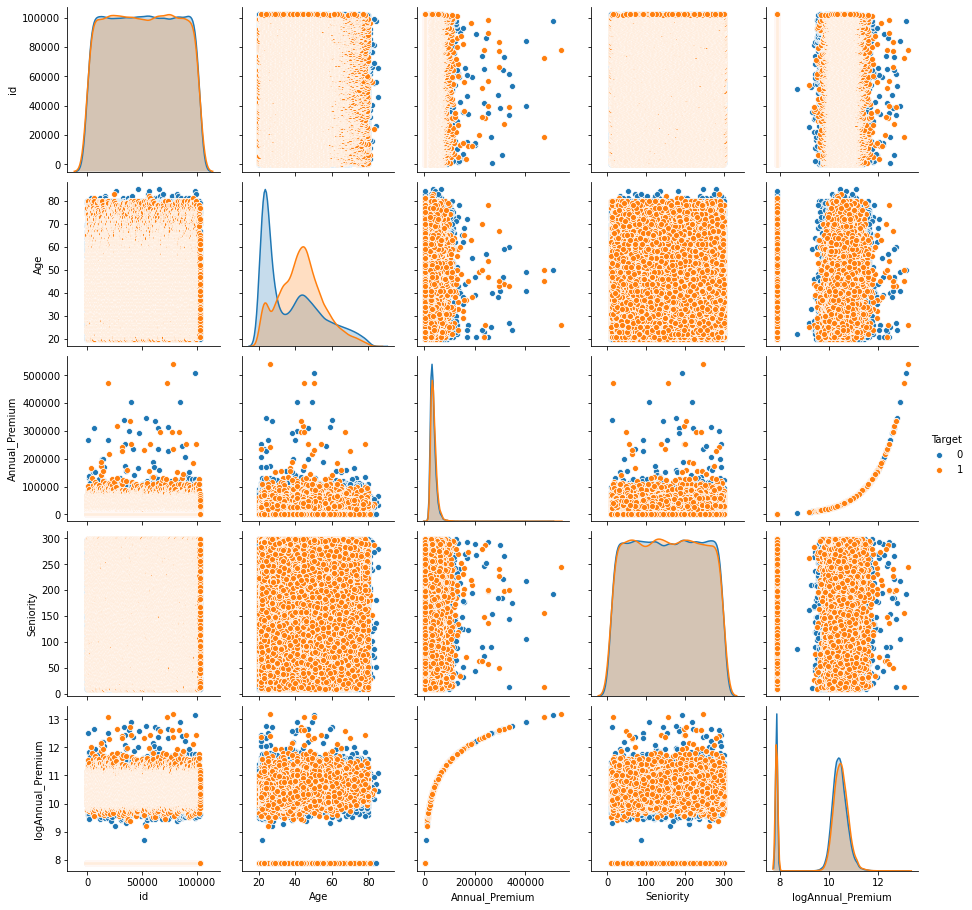

In [26]:
sns.pairplot(df_numerical[['id', 'Age', 'Annual_Premium', 'Seniority', 'Target','logAnnual_Premium']],hue='Target') #pairplot

# Standardize

In [27]:
#data standardization using standard scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,id,Age,Annual_Premium,Seniority,Target,logAnnual_Premium
0,-1.732034,0.276696,-0.285423,-0.030179,-0.681696,0.139586
1,-1.732000,-1.129329,-1.602691,1.211837,-0.681696,-2.106621
2,-1.731966,0.209743,2.278266,0.829678,-0.681696,1.134769
3,-1.731932,1.347954,1.012467,-0.818382,-0.681696,0.763617
4,-1.731899,0.142789,0.080957,-0.269028,-0.681696,0.359094


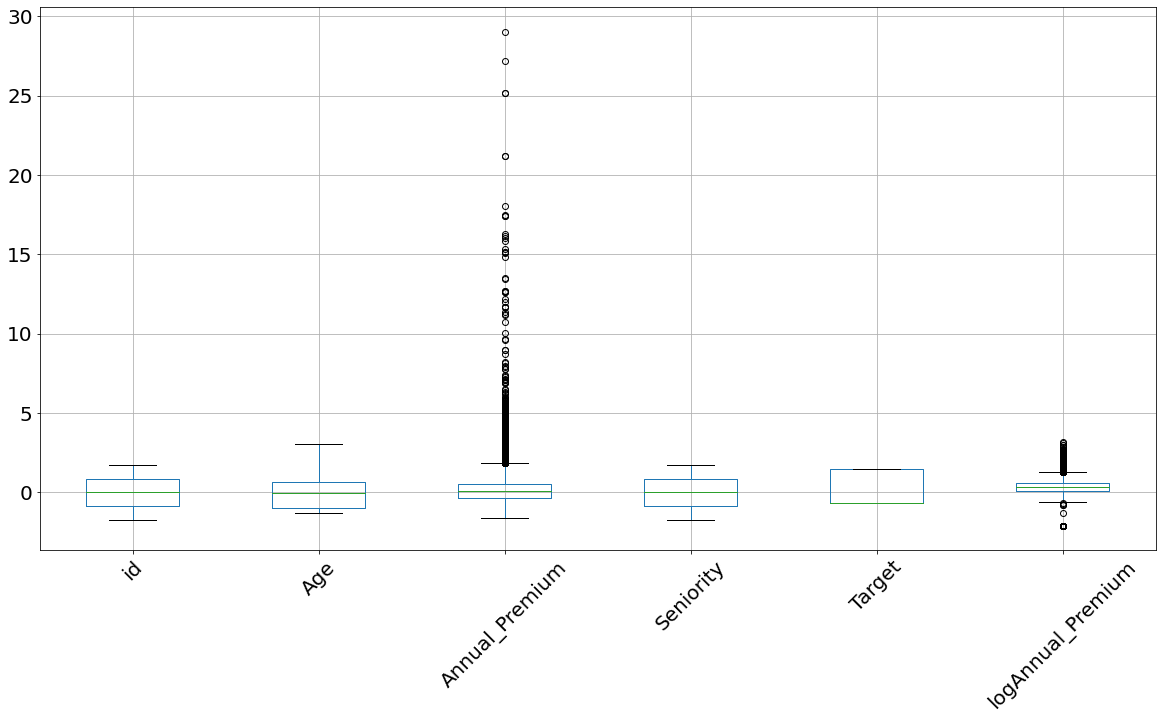

In [28]:
scaled_df.boxplot(fontsize=20, rot=45, figsize=(20,10)) #boxplot

In [29]:
scaled_df.tail()


,id,Age,Annual_Premium,Seniority,Target,logAnnual_Premium
102346,1.731899,-0.995422,0.224933,-0.257086,-0.681696,0.433530
102347,1.731932,0.477557,-0.010524,-0.483993,1.466929,0.308696
102348,1.731966,2.151397,1.259380,-0.746727,1.466929,0.847842
102349,1.732000,-0.995422,-0.251110,-0.328741,-0.681696,0.162349
102350,1.732034,2.017490,-1.602691,-1.164713,-0.681696,-2.106621


In [30]:
X_numerical=scaled_df[['Age','logAnnual_Premium']] #scale some variables

In [31]:
dummies.tail(10)

,Gender_Male,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
102341,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102343,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102344,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102345,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
102346,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102348,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
102349,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102350,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(102351, 198)
(102351, 2)


,Gender_Male,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
102346,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102348,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
102349,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102350,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X1=pd.concat([dummies,X_numerical], axis = 1) #concatenation between dummies and X_numerical
X1.tail()

,Gender_Male,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Age,logAnnual_Premium
102346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.995422,0.433530
102347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.477557,0.308696
102348,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2.151397,0.847842
102349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.995422,0.162349
102350,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.017490,-2.106621


# Imbalanced data

In [34]:
#Print class freq. through pandas
print(df2.groupby('Target').size()) #"target" is the name of the target column, change it accordingly to your dataset

Target
0    69878
1    32473
dtype: int64


In [35]:
#some imports to plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

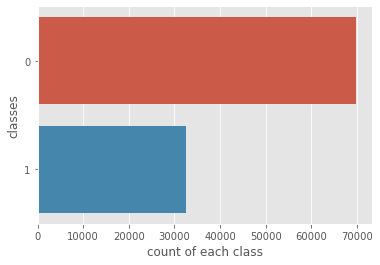

In [36]:
#Visualize Class Counts
sns.countplot(y=df2.Target ,data=df2) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

# Separate Train/Test sets

In [37]:
y=df2['Target']

In [38]:
y.shape

(102351,)

In [39]:
#separate x and y
X = X1.iloc[:,0:-1] 
y = df2.iloc[:,-1]

from sklearn.model_selection import train_test_split

#slpit data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, stratify=y,random_state= 123) 

print(X_train.shape, X_test.shape)


(81880, 199) (20471, 199)


# Model

In [40]:
#import all needed types of model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [41]:
#define hyperp_search

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [42]:
#define a function to plot the roc curve 

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target  

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

# Decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)



f1_train: 0.684758 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1_test:  0.6849699398797595
[[10628  3348]
 [ 1368  5127]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82     13976
           1       0.60      0.79      0.68      6495

    accuracy                           0.77     20471
   macro avg       0.75      0.77      0.75     20471
weighted avg       0.80      0.77      0.78     20471



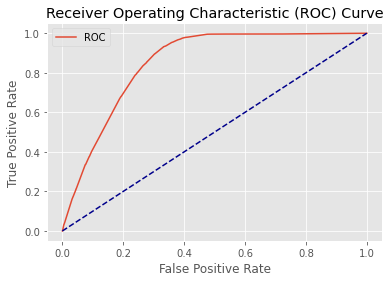

AUC: 0.85


In [44]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=20)

#plot roc curve
fpr,tpr=roc(model_tree,X_train,y_train,X_test,y_test)

In [45]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=3)
print(r)

#we can see the levels of the decision tree

|--- Previously_Insured_Yes <= 0.50
|   |--- Vehicle_Damage_Yes <= 0.50
|   |   |--- Policy_Sales_Channel_157 <= 0.50
|   |   |   |--- Policy_Sales_Channel_156 <= 0.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Policy_Sales_Channel_156 >  0.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- Policy_Sales_Channel_157 >  0.50
|   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- Gender_Male >  0.50
|   |   |   |   |--- truncated branch of depth 5
|   |--- Vehicle_Damage_Yes >  0.50
|   |   |--- Age <= -0.89
|   |   |   |--- Policy_Sales_Channel_160 <= 0.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Policy_Sales_Channel_160 >  0.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- Age >  -0.89
|   |   |   |--- Age <= 1.18
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Age >  1.18
|   |   |   |   |--- truncated branch of depth 7
|--- Previously_Insured_

# Prediction

In [46]:
#Import values in which I want to make my predictions
df3 = pd.read_csv('prediction_independent.csv')

values = {'Licence_Type':'Z'} 
df3=df.fillna(value=values).head(102351)

In [47]:
df3.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [48]:
df3['Region_Code']=df3['Region_Code'].astype(object)
df3['Driving_License']=df3['Driving_License'].astype(object)
df3['Policy_Sales_Channel']=df3['Policy_Sales_Channel'].astype(object)

In [49]:
df3_categorical=df3.select_dtypes(include=['object'])

In [50]:
df3_categorical.columns

Index(['Gender', 'Driving_License', 'Licence_Type', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel'],
      dtype='object')

In [51]:
dummies3 = pd.get_dummies(df3_categorical[['Gender', 'Region_Code',
'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
'Policy_Sales_Channel']],drop_first=True)

In [52]:
df3_numerical=df3.select_dtypes(include=['int64','float64'])
df3_numerical['logAnnual_Premium']=df3_numerical['Annual_Premium'].apply(math.log)

In [53]:
scaled_df3 = pd.DataFrame(scaler.transform(df3_numerical))
scaled_df3.columns = df3_numerical.columns

In [54]:
X3_numerical=scaled_df3[['Age','logAnnual_Premium']]
X3=pd.concat([dummies3,X3_numerical], axis = 1)

In [55]:
list(set(X)-set(X3))

[]

In [56]:
i=0
for x in list(set(X)-set(X3)):
    X3[x]=0
    i+=1

In [57]:
X3.columns

Index(['Gender_Male', 'Region_Code_1', 'Region_Code_2', 'Region_Code_3',
       'Region_Code_4', 'Region_Code_5', 'Region_Code_6', 'Region_Code_7',
       'Region_Code_8', 'Region_Code_9',
       ...
       'Policy_Sales_Channel_154', 'Policy_Sales_Channel_155',
       'Policy_Sales_Channel_156', 'Policy_Sales_Channel_157',
       'Policy_Sales_Channel_158', 'Policy_Sales_Channel_159',
       'Policy_Sales_Channel_160', 'Policy_Sales_Channel_163', 'Age',
       'logAnnual_Premium'],
      dtype='object', length=200)

In [58]:
i=0
for x in list(set(X3)-set(X)):
    X3=X3.drop([x],axis=1)
    i+=1

In [59]:
X3.columns

Index(['Gender_Male', 'Region_Code_1', 'Region_Code_2', 'Region_Code_3',
       'Region_Code_4', 'Region_Code_5', 'Region_Code_6', 'Region_Code_7',
       'Region_Code_8', 'Region_Code_9',
       ...
       'Policy_Sales_Channel_153', 'Policy_Sales_Channel_154',
       'Policy_Sales_Channel_155', 'Policy_Sales_Channel_156',
       'Policy_Sales_Channel_157', 'Policy_Sales_Channel_158',
       'Policy_Sales_Channel_159', 'Policy_Sales_Channel_160',
       'Policy_Sales_Channel_163', 'Age'],
      dtype='object', length=199)

In [60]:
y3_pred = model_tree.predict(X3)

In [61]:
list(set(X) - set(X3))


[]

In [62]:
X3['default_yes']=0

In [63]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)
model_tree.fit(X, y)

y3_pred = model_tree.predict(X3)

y3=df2.target
print("f1_test: ", f1_score(y3, y3_pred))
print(confusion_matrix(y3, y3_pred))
print(classification_report(y3, y3_pred))

ValueError: Number of features of the model must match the input. Model n_features is 199 and input n_features is 200 

In [ ]:
predictions=pd.DataFrame()

predictions['y_pred']=y_pred

predictions.to_csv('10607888.csv',index=False)